In [49]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import optimize

### Диод 2 - ДЗ10-8604

      x         y
0  0.90  0.054428
1  0.95  0.054735
2  1.00  0.055033
3  1.05  0.055314
4  1.10  0.055570
-49.19999999999972


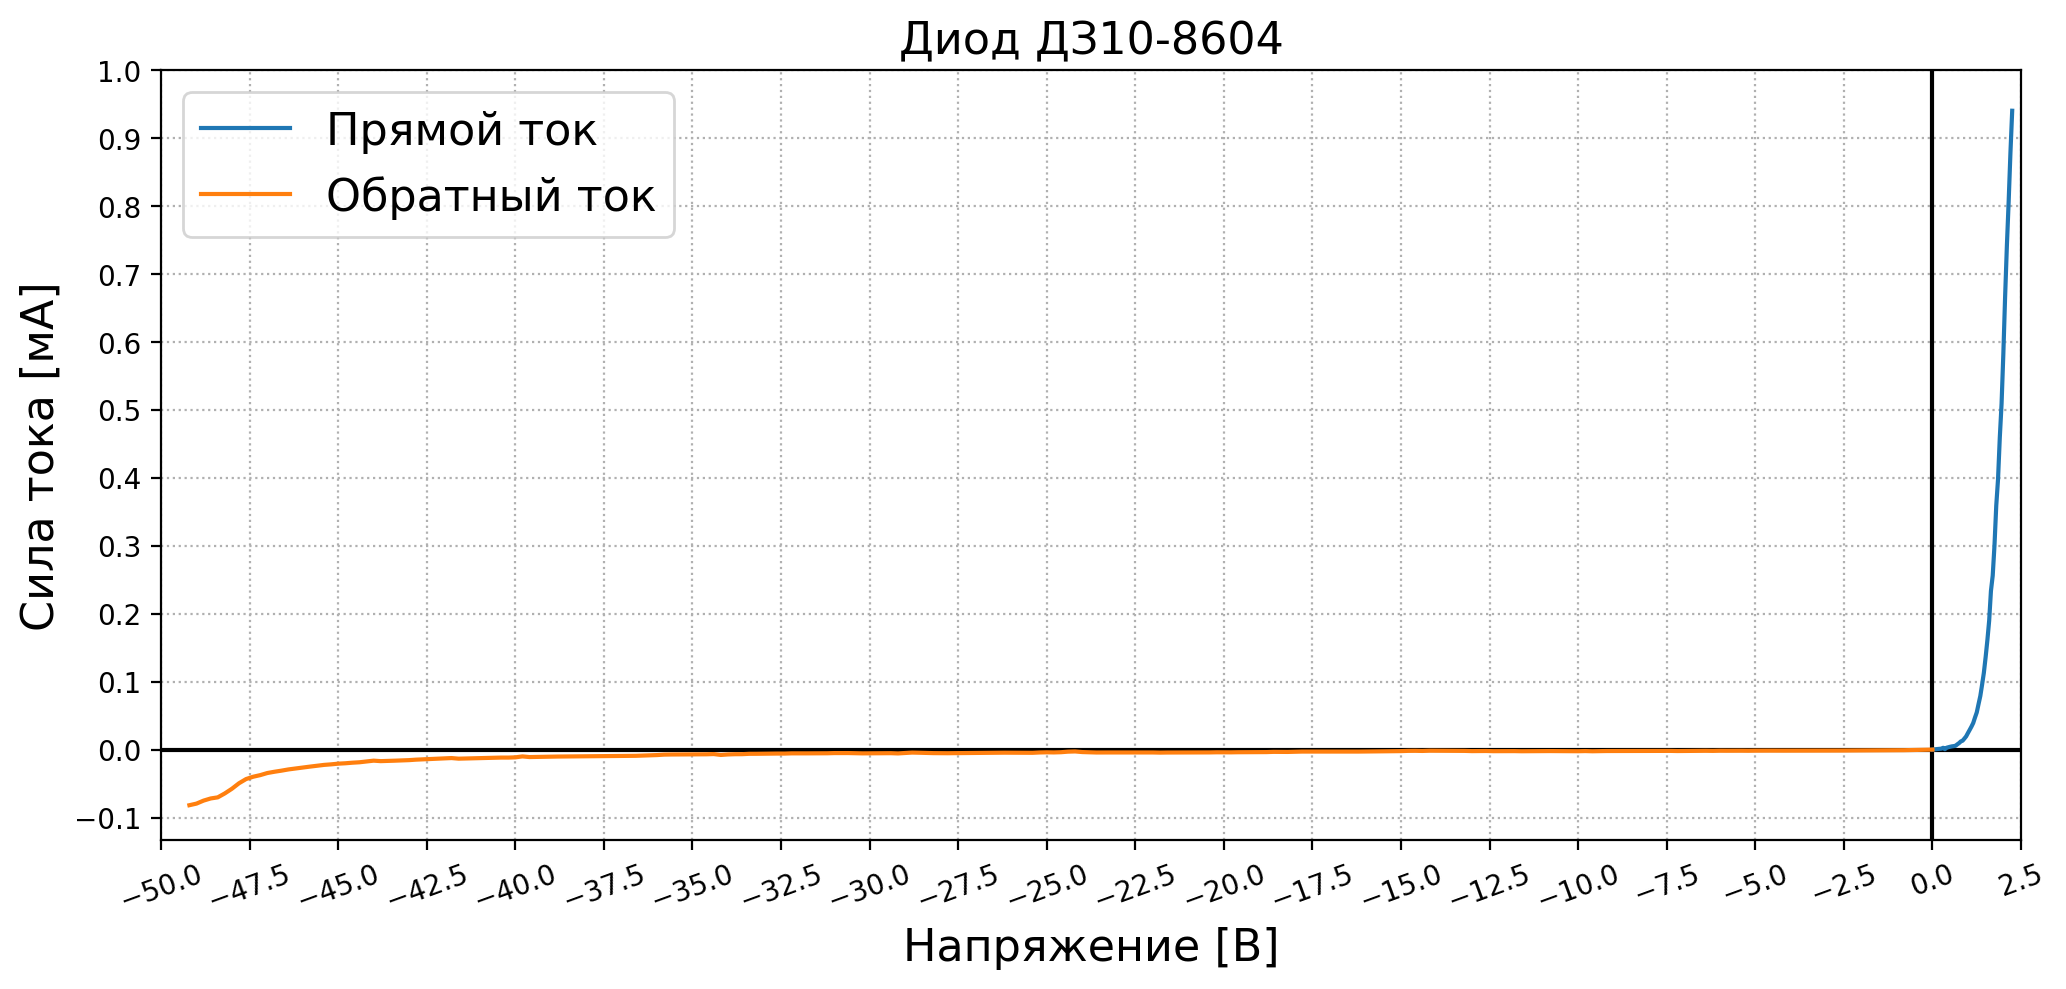

In [62]:
data = pd.read_csv("dz10_8604_up.csv")

y_scale = 0.1 #мА на деление
x_scale = 0.5 #В на деление
data.x *= x_scale
data.y *= y_scale

data_down = pd.read_csv("dz10_8604_down.csv", sep = ';')
y_scale_down, x_scale_down = 0.01, 10 #мА, Вольт
data_down.x *= x_scale_down
data_down.y *= y_scale_down

data_down.x -= np.max(data_down.x)
data_down.y -= np.max(data_down.y)

data.sort_values('x')
print(data.head())
data.x -= np.min(data.x)
data.y -= np.min(data.y)
x_line = np.linspace(np.min(data.x), np.max(data.x), 1000)
print(np.min(data_down.x))



plt.figure(figsize = (12, 5), dpi = 200)

plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.plot(data.x, data.y, label = 'Прямой ток')
plt.plot(data_down.x, data_down.y, label = 'Обратный ток')
plt.title("Диод ДЗ10-8604", fontsize = 16)
plt.xlabel("Напряжение [В]", fontsize = 16)
plt.ylabel("Сила тока [мА]", fontsize = 16)
plt.xticks(np.arange(-50, 10, 2.5), rotation = 20)
plt.yticks(np.arange(-0.1, 1.05, 0.1), rotation = 0)
plt.grid(ls = ':')
plt.xlim(-50, 2.5)
plt.legend(fontsize = 16)

In [71]:
def interp_func(x, a, theta):
    return a * (np.exp(x / (theta * 26 * 1e-3)) - 1)
pram, _ = optimize.curve_fit(interp_func, data.x * 1e-3, data.y, p0 = [2, 1.4])

In [72]:
print(pram)

[0.0040614  0.01566094]


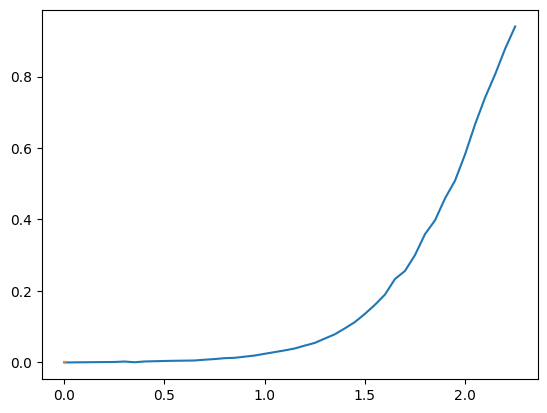

In [73]:
x_line = np.linspace(min(data.x) * 1e-3, max(data.x) * 1e-3, 1000)
plt.plot(data.x, data.y)
plt.plot(x_line, interp_func(x_line * 1e-3, *pram))


### Белый диод

      x         y
0  0.07  0.005069
1  0.08  0.004730
2  0.09  0.004739
3  0.10  0.004767
4  0.11  0.004805
-0.5699999999999994


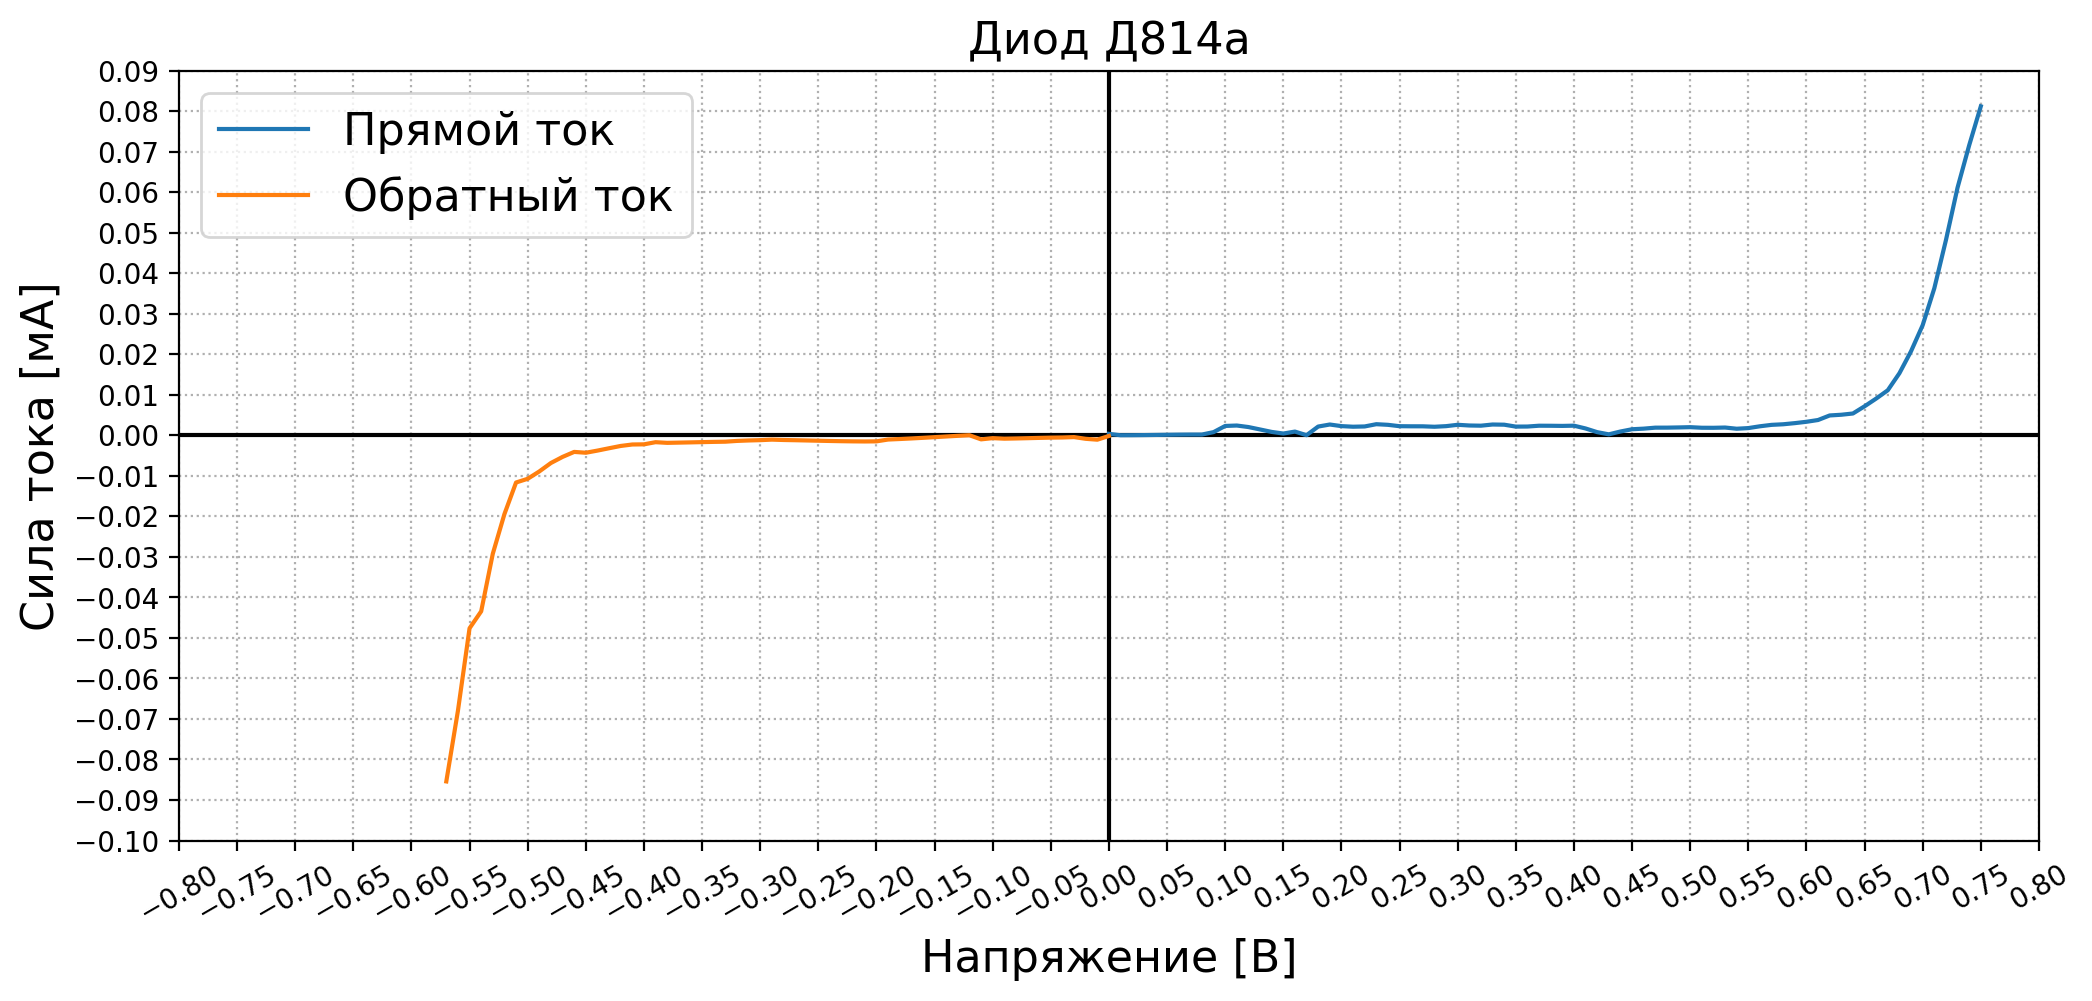

In [54]:
data = pd.read_csv("d814a_up.csv")

y_scale = 0.01 #мА на деление
x_scale = 0.1 #В на деление
data.x *= x_scale
data.y *= y_scale

data_down = pd.read_csv("d814a_down.csv")
y_scale_down, x_scale_down = 0.01, 0.1 #мА, Вольт
data_down.x *= x_scale_down
data_down.y *= y_scale_down

data_down.x -= np.max(data_down.x)
data_down.y -= np.max(data_down.y)

data.sort_values('x')
print(data.head())
data.x -= np.min(data.x)
data.y -= np.min(data.y)
x_line = np.linspace(np.min(data.x), np.max(data.x), 1000)
print(np.min(data_down.x))



plt.figure(figsize = (12, 5), dpi = 200)

plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.plot(data.x, data.y, label = 'Прямой ток')
plt.plot(data_down.x, data_down.y, label = 'Обратный ток')
plt.title("Диод Д814а", fontsize = 16)
plt.xlabel("Напряжение [В]", fontsize = 16)
plt.ylabel("Сила тока [мА]", fontsize = 16)
plt.xticks(np.arange(-10, 10, 0.05), rotation = 30)
plt.yticks(np.arange(-0.1, 0.1, 0.01), rotation = 0)
plt.grid(ls = ':')
plt.xlim(-0.8, 0.8)
plt.legend(fontsize = 16)

In [55]:
def interp_func(x, a, theta):
    return a * (np.exp(x / (theta * 26 * 1e-3)) - 1)
pram, _ = optimize.curve_fit(interp_func, data.x, data.y)

In [56]:
print(pram)

[4.17273412e-09 1.71205058e+00]


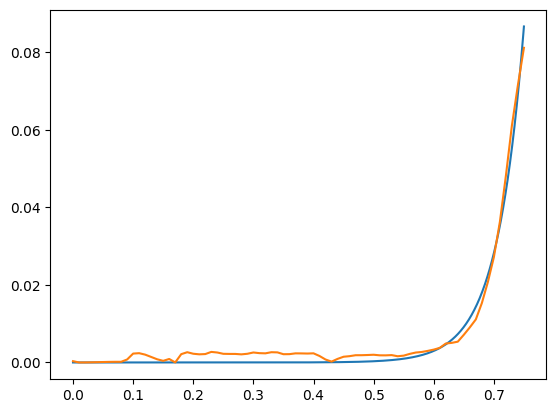

In [57]:
x_line = np.linspace(min(data.x), max(data.x), 1000)
plt.plot(x_line, interp_func(x_line, *pram))
plt.plot(data.x, data.y)
